In [42]:
import numpy as np
import keras
from keras import layers
from matplotlib import pyplot as plt
import random

In [43]:
num_classes = 10
input_shape = (28, 28, 1)


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [44]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [45]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 40s 92ms/step - loss: 0.3699 - accuracy: 0.8854 - val_loss: 0.0897 - val_accuracy: 0.9762
Epoch 2/3
422/422 [==============================] - 42s 100ms/step - loss: 0.1175 - accuracy: 0.9646 - val_loss: 0.0559 - val_accuracy: 0.9845
Epoch 3/3
422/422 [==============================] - 36s 86ms/step - loss: 0.0851 - accuracy: 0.9739 - val_loss: 0.0484 - val_accuracy: 0.9868


In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0445
Test accuracy: 0.9856


In [47]:
# Prova de acurácia em um determinado grupo de amostras

predictions = model.predict(x_test)

for i in range(10):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    print(f"Amostra {i + 1}: Label prevista: {predicted_label}, Label verdadeira: {true_label}")


313/313 [==============================] - 2s 7ms/step
Amostra 1: Label prevista: 7, Label verdadeira: 7
Amostra 2: Label prevista: 2, Label verdadeira: 2
Amostra 3: Label prevista: 1, Label verdadeira: 1
Amostra 4: Label prevista: 0, Label verdadeira: 0
Amostra 5: Label prevista: 4, Label verdadeira: 4
Amostra 6: Label prevista: 1, Label verdadeira: 1
Amostra 7: Label prevista: 4, Label verdadeira: 4
Amostra 8: Label prevista: 9, Label verdadeira: 9
Amostra 9: Label prevista: 5, Label verdadeira: 5
Amostra 10: Label prevista: 9, Label verdadeira: 9


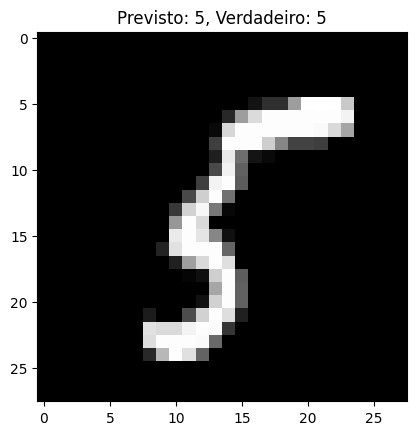

In [48]:
# Prova de ácuracia por meio de visualização dos dados

sample_index = random.randint(0, len(x_test) - 1)

predicted_label = np.argmax(predictions[sample_index])
true_label = np.argmax(y_test[sample_index])

image = (x_test[sample_index] * 255).astype('uint8')

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Previsto: {predicted_label}, Verdadeiro: {true_label}")
plt.show()